#########################
sphere1 inside sphere2 
random generate
[ 1.53172551  0.375721   -0.40105891]
#########################
sphere1 inside sphere2 
random generate
[0.48251035 0.0677248  0.37178189]
#########################
sphere1 inside sphere2 
random generate
[-0.63445957  0.35116837 -0.0339356 ]
#########################
sphere1 inside sphere2 
random generate
[ 0.25137629  0.85023041 -1.52067904]
#########################
sphere1 inside sphere2 
random generate
[ 1.39253155  0.43509689 -0.69709634]
#########################
sphere1 inside sphere2 
random generate
[1.04884296 0.33281565 0.68038249]
#########################
sphere1 and sphere2 overlapping
random generate
[-0.03943208  0.20618123  0.30151538]
#########################
spheres overlapping
random generate
[1.06543585 1.50823342 1.12150305]
#########################
spheres overlapping
random generate
[3.01649141 1.13012801 1.08920491]


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


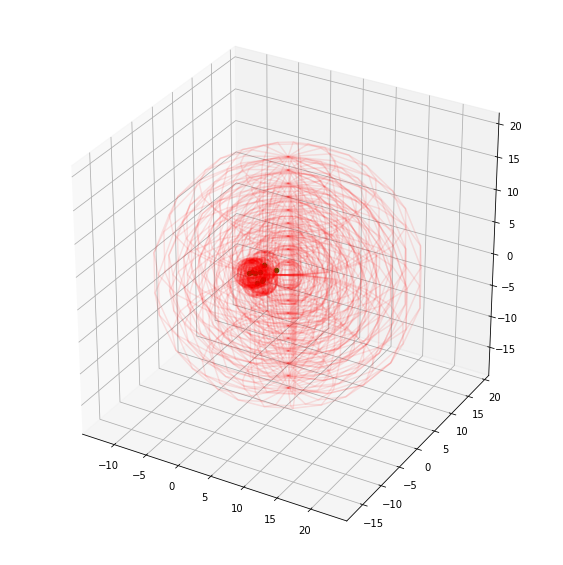

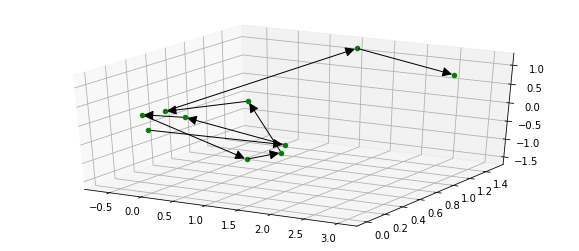

In [62]:
from stp_brownian import sphere1_and_sphere2_overlap, sphere1_inside_sphere2, find_random_pt,WireframeSphere
import numpy as np
import numpy as np
from pylab import show
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from numpy import linalg as LA
import math
from numpy.linalg import inv

vmax = 2
t = 10
x_val = 0
y_val = 0
z_val = 0 

steps = []
steps.append([x_val,y_val,z_val])

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

for i in range(1,t):
    print("#########################")
    c_sp1 = np.array([x_val,y_val,z_val])
#     print("c_sp1")
#     print(c_sp1)
    radius_sp1 = vmax*(1)
#     print("radius_sp1")
#     print(radius_sp1)
    c_sp2 = np.array([5,1,1])
#     print("c_sp2")
#     print(c_sp2)
    radius_sp2 = vmax*(t-i)
#     print("radius_sp2")
#     print(radius_sp2)
    x_val,y_val,z_val = find_random_pt(c_sp1, c_sp2, radius_sp1, radius_sp2, plotval = False)
#     print("generated")
#     print(x_val,y_val,z_val)
    steps.append([x_val,y_val,z_val])
            #Draw Two Original Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
    sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.1)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
    sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.1)
    ax.scatter(x_val,y_val,z_val,  color = "g")

fig.show()


class Arrow3D(FancyArrowPatch):
    def __init__(self, start=[0,0,0], end=[1,1,1], *args, **kwargs):
        if "arrowstyle" not in kwargs:
            kwargs["arrowstyle"] = "-|>"
        if "mutation_scale" not in kwargs:
            kwargs["mutation_scale"] = 20
        if "color" not in kwargs:
            kwargs["color"] = "k"
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        xs = [start[0], end[0]]
        ys = [start[1], end[1]]
        zs = [start[2], end[2]]
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

        
start_pt = [0,0,0]
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
for i in steps:
    ax.scatter(i[0],i[1],i[2],  color = "g")
    ax.add_artist(Arrow3D(start=start_pt, end=i))
    start_pt = i

fig.show()


# # Two spheres overlapping
# c_sp1 = np.array([10,10,10])
# radius_sp1 = 40
# c_sp2 = np.array([50,20,25])
# radius_sp2 = 20 

# # sphere1 inside sphere2 
# c_sp1 = np.array([10,10,10])
# radius_sp1 = 20
# c_sp2 = np.array([50,20,25])
# radius_sp2 = 70 

# # sphere2 inside sphere1 
# c_sp1 = np.array([50,20,25])
# radius_sp1 = 70
# c_sp2 = np.array([10,10,10])
# radius_sp2 = 20 

# # spheres close(a lot of remaining time)
# c_sp1 = np.array([50,20,25])
# radius_sp1 = 100
# c_sp2 = np.array([10,10,10])
# radius_sp2 = 100